<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

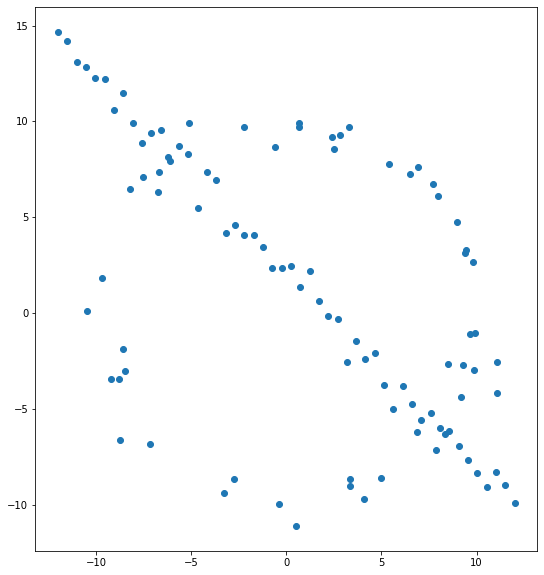

In [1]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt

M= 100
half_m = M//2
R = 10
S = R/16
T = np.random.uniform(0, 2*np.pi, half_m)
n= S*np.random.randn(half_m)
x, y = (R + n)*np.cos(T), (R + n)*np.sin(T)
X_circ = np.hstack((x.reshape( half_m, 1), y.reshape(half_m, 1)))

m, q = -1, 2
x = np.linspace (-12, 12 , half_m)
y = m*x + q + S*np.random.randn(half_m)
X_line = np.hstack((x.reshape(half_m, 1 ), y.reshape(half_m, 1 )))

X = np.vstack((X_circ, X_line))

p = X[:,0] 
q = X[:,1] 


plt.figure(figsize=(9, 10))
plt.plot(p, q, 'o')
plt.plot

In [2]:
def findCircle(pnt_1, pnt_2, pnt_3):
    x_1, y_1 = pnt_1[0], pnt_1[1]
    x_2, y_2 = pnt_2[0], pnt_2[1]
    x_3, y_3 = pnt_3[0], pnt_3[1]

    a_1 = x_1 - x_2
    a_2 = x_1 - x_3

    b_1 = y_1 - y_2
    b_2 = y_1 - y_3

    c_1 = (x_2**2 - x_1**2 + y_2**2 - y_1**2)/2
    c_2 = (x_3**2 - x_1**2 + y_3**2 - y_1**2)/2

    A = np.array([[a_1, b_1], [a_2, b_2]], dtype=np.float32)
    C = np.array([[c_1], [c_2]], dtype=np.float32)

    G_F = np.linalg.pinv(A) @ C
    G = -G_F[0][0]
    F = -G_F[1][0]
    C = -(x_1**2 + y_1**2  + 2*G*x_1 + 2*F*y_1)
    R_POW_2 = G**2 + F**2 - C

    if (R_POW_2 > 0):
        r_1 = np.sqrt((x_1-G)**2 + (y_1-G)**2)
        r_2 = np.sqrt((x_2-G)**2 + (y_2-F)**2)
        r_3 = np.sqrt((x_3-G)**2 + (y_3-F)**2)
        r = np.mean([r_1, r_2, r_3])
        return (G, F, R)
    else:
        return None



In [3]:
def RANSAC(Set, A, B, R, T):
    in_TH = R - T 
    out_TH = R + T 
    INL_ARR=[]
    INL_CT = 0
    ERROR = 0

    for p_t in Set:
        x, y = p_t[0], p_t[1]     
        r_cal = np.sqrt((x-A)**2 + (y-B)**2)   
        if (in_TH < r_cal < out_TH) & (5 < R < 15):  
            INL_CT += 1
            ERROR += np.abs(r_cal - R)
            INL_ARR.append(p_t)

    return INL_CT,INL_ARR,ERROR